In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('boston.csv')
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [133]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [134]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

In [135]:
df.shape

(506, 14)

In [136]:
missing_val = df.isin(['?', '', 'None', 'NaN']).sum()
missing_val


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [137]:
rows_to_drop = df.isin(['?', '', 'None', 'NaN']).any(axis=1)
df_with_missing = df[rows_to_drop]
df_with_missing


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [138]:
# Drop the rows with missing values from the original DataFrame
df.drop(df_with_missing.index, inplace=True)

# Check again
missing_val = df.isin(['?', '', 'None', 'NaN']).sum()
missing_val


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [139]:
df_ = df.loc[:,['AGE','LSTAT','MEDV']]
df_.head(5)

,AGE,LSTAT,MEDV
0,65.2,4.98,24.0
1,78.9,9.14,21.6
2,61.1,4.03,34.7
3,45.8,2.94,33.4
4,54.2,5.33,36.2


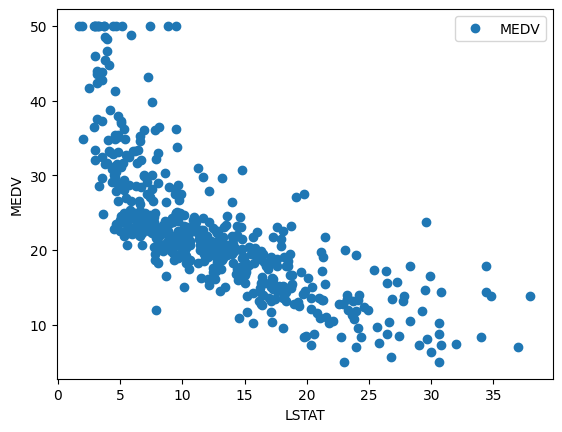

In [140]:
df.plot(x='LSTAT',y='MEDV',style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [141]:
x = df[['AGE', 'LSTAT']]
y = df['MEDV']
# x = pd.DataFrame(df.iloc[:, :-1])
# y = pd.DataFrame(df.iloc[:, -1])

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [144]:
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [145]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Predictions: {y_pred}')
print(f'True values: {y_test.values}')

Mean Squared Error: 49.312606628201
Predictions: [25.77300855 28.24102582 28.84100485 28.11784129 22.66275532 19.34257918
 33.99649112 17.41631215 21.13054796 32.45951149 21.40245847 25.35840245
 25.37382209 31.29334048 29.64903523 29.81551363 28.33541678 21.65166704
 24.25829005 20.69249315 31.32028914 18.02044847 25.03154348 28.0553909
 30.90666984 24.54280423 16.64422589 19.20595326 31.47112361  1.46138699
 25.44676455 29.01355447 27.4404315  25.71583558 17.04136664 20.95241342
  1.4485841  30.25521725 28.57886317 26.98301939 29.57085615 27.79412931
 15.59563254 29.16267268 16.67662768 27.48101766 21.4797355  22.47201556
 31.16318268 19.44900275 24.0642966 ]
True values: [28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7]


In [146]:
print(regressor.coef_)

[ 0.84338848 -7.14239031]


In [147]:
y_pred = regressor.predict(x_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [148]:
y_pred

array([ 7.34416031e+00, -5.45184214e+00,  3.78218734e+00,  9.15305875e+00,
        1.16127397e+01, -1.95908884e+01,  8.63481738e+01, -2.89977142e+01,
       -2.35004011e+01,  7.27222569e+01, -6.65474592e+00,  1.67321842e+01,
        7.08801011e+00,  3.69375389e+01,  1.56900135e+01,  5.70833542e+01,
       -1.76069696e+00, -1.98949599e+00, -1.02767947e+01, -4.90281237e+00,
        7.14873014e+01, -2.36356391e+01,  1.85001663e+01,  1.22332845e+01,
        2.38072920e+01, -8.82170330e+00, -3.36023065e+01, -2.32045439e+01,
        4.25426477e+01, -1.39020272e+02, -8.50312708e+00,  4.40859722e+01,
        6.10936585e-02, -2.55325236e+01, -3.23538542e+01, -1.90396416e+01,
       -1.46725436e+02,  2.00597865e+01,  2.39442528e+01,  2.58836432e+01,
        8.46426929e+00,  3.59884579e+01, -3.85982642e+01,  6.69686901e+00,
       -4.00423877e+01,  1.84095829e+01, -2.39299293e+00,  2.70628432e+00,
        4.96680045e+01, -1.49332710e+01,  1.64104743e+01])

In [149]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
433    14.3
161    50.0
129    14.3
269    20.7
226    37.6
107    20.4
222    27.5
181    36.2
275    32.0
277    33.1
262    48.8
325    24.6
184    26.4
176    23.2
154    17.0
157    41.3
446    14.9
114    18.5
324    25.0
192    36.4
336    19.5
7      27.1
458    14.9
282    46.0
412    17.9
197    30.3
227    31.6
347    23.1
43     24.7
476    16.7
497    18.3
438     8.4
291    37.3
311    22.1
91     22.0
228    46.7
223    30.1
402    12.1
194    29.1
47     16.6
343    23.9
361    19.9
479    21.4
280    45.4
24     15.6
164    22.7
Name: MEDV, dtype: float64

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 30.1056184020395
Mean Squared Error: 1786.140380726861
Root Mean Squared Error: 42.26275405989133


In [151]:
# In ra hệ số tự do (intercept) của mô hình
print("Hệ số tự do (intercept):", regressor.intercept_)

Hệ số tự do (intercept): 22.12483516483517


In [166]:
# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = df[['AGE', 'LSTAT']]
y = df['MEDV']

# Chia tập dữ liệu theo tỉ lệ 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tính hệ số R^2
r_squared = model.score(X_train_scaled, y_train)
r_squared  # Đổi sang phần trăm

0.5480883767100382

In [173]:
# Giá trị của age và lstat cần dự báo
input_data = [[37.5, 4.65]]

# Chuẩn hóa dữ liệu đầu vào sử dụng scaler đã huấn luyện
input_data_scaled = scaler.transform(input_data)

# Dự báo giá trị medv
predicted_medv = regressor.predict(input_data_scaled)

# In ra kết quả dự đoán
print(f"Giá trị dự báo của medv khi age = 37.5 và lstat = 4.65: {predicted_medv[0]:f}")


Giá trị dự báo của medv khi age = 37.5 và lstat = 4.65: 29.454799


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [168]:
# Lấy dòng dữ liệu đầu tiên của tập dữ liệu đầu ra trên tập huấn luyện
first_y_train = y_train.iloc[0]

# In ra kết quả
print(f"Dòng dữ liệu đầu tiên của tập dữ liệu đầu ra (train): {first_y_train}")


Dòng dữ liệu đầu tiên của tập dữ liệu đầu ra (train): 12.5


In [170]:
X = df[['AGE', 'LSTAT']]
y = df['MEDV']

# Chia tập dữ liệu theo tỉ lệ 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Lấy dòng cuối cùng của tập dữ liệu đầu vào cho tập train
last_row_train_scaled = X_train_scaled[-1]
last_row_train_scaled

array([-0.21856566, -0.34247973])

In [163]:
from sklearn.metrics import mean_absolute_percentage_error

# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = df[['AGE', 'LSTAT']]
y = df['MEDV']

# Chia tập dữ liệu theo tỉ lệ 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test_scaled)

# Tính MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)   # Đổi sang phần trăm
mape

np.float64(0.2012807931898763)

In [157]:
# In ra hệ số góc của biến AGE
age_coefficient = regressor.coef_[0]  # Hệ số của biến AGE là phần tử đầu tiên trong coef_
print(f'Hệ số góc của biến AGE trong mô hình là: {age_coefficient:.4f}')


Hệ số góc của biến AGE trong mô hình là: 0.8434


In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

# Lấy dòng đầu tiên của dữ liệu đã chuẩn hóa
first_row_scaled = X_train_scaled[0]
first_row_scaled

array([0.96775636, 0.91299676])

In [159]:
# Dự đoán trên tập kiểm thử với dữ liệu đã chuẩn hóa
X_test_scaled = scaler.transform(x_test)
y_pred = regressor.predict(X_test_scaled)

# Lấy giá trị dự đoán đầu tiên
first_prediction = y_pred[0]
first_prediction


np.float64(25.77300854550555)

In [160]:
train_size = x_train.shape
train_size

(455, 2)